In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as sk
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
import warnings
warnings.simplefilter(action = "ignore")

In [3]:
data = pd.read_csv(r"F:\DSA\Assignments\Data\Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
purchase_counts = data['Purchased'].value_counts()
purchase_counts

Purchased
0    257
1    143
Name: count, dtype: int64

In [7]:
data['EstimatedSalary'].nunique()

117

In [8]:
data['Age'].nunique()

43

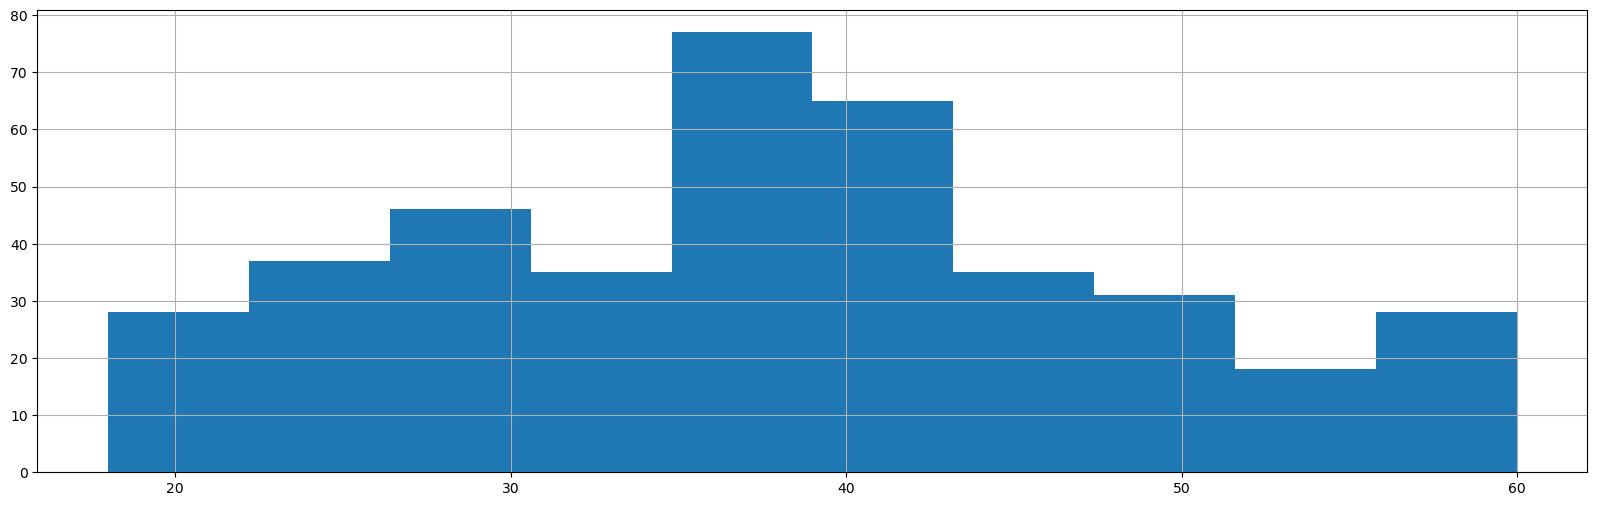

In [9]:
data['Age'].hist(figsize = (20,6))
plt.show()

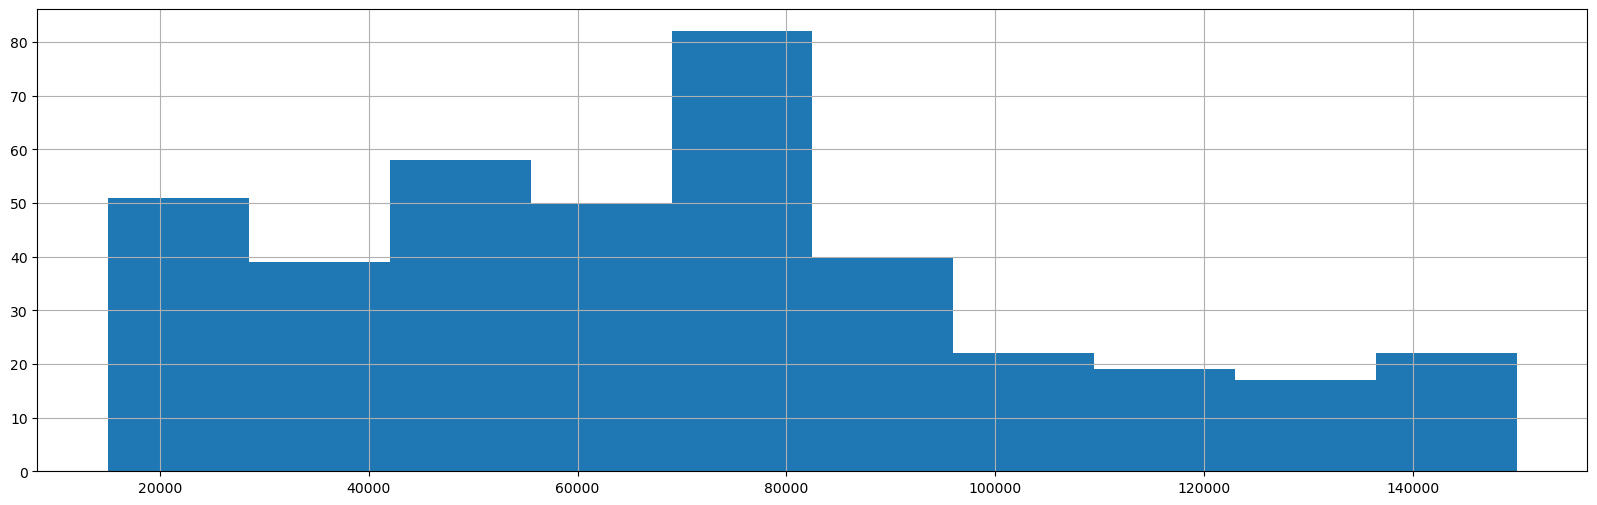

In [10]:
data['EstimatedSalary'].hist(figsize = (20,6))
plt.show()

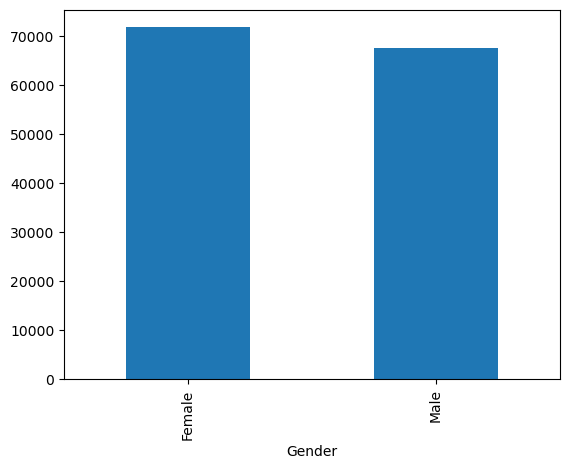

In [11]:
data.groupby('Gender')['EstimatedSalary'].mean().plot(kind = 'bar')
plt.show()

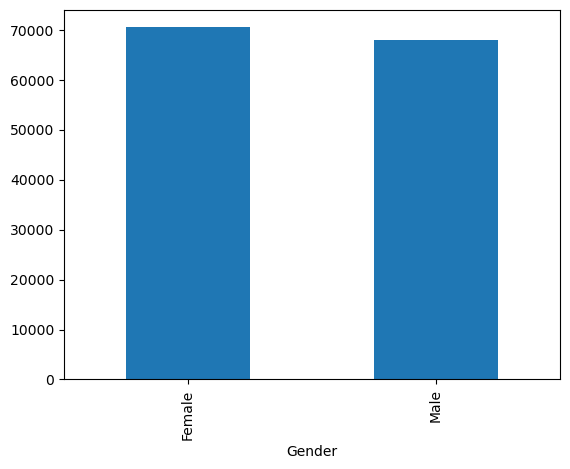

In [12]:
data.groupby('Gender')['EstimatedSalary'].median().plot(kind = 'bar')
plt.show()

In [13]:
from scipy.stats import chi2_contingency

In [14]:
contingency_table = pd.crosstab(data['Gender'], data['Purchased'])
contingency_table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [15]:
chi2, pval, dof, exp = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", pval)

Chi-Square Statistic: 0.5550869364098915
p-value: 0.45624659183130645


**There's no real association between gender and purchase behavior. Since it's greater than 0.05, we fail to reject the null hypothesis of no association**

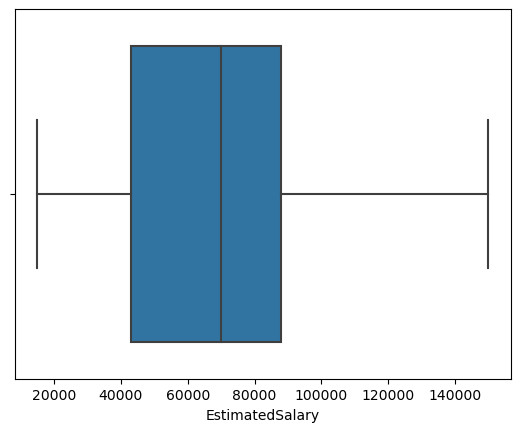

In [16]:
sns.boxplot(x = data['EstimatedSalary'])
plt.show()

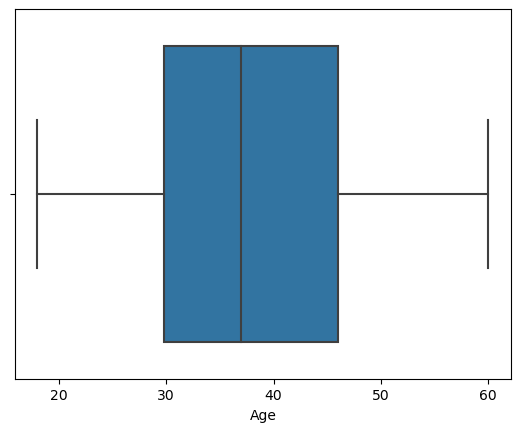

In [17]:
sns.boxplot(x = data['Age'])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
x = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [19]:
sc = sk.StandardScaler()
x_scaled = sc.fit_transform(x)
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

In [20]:
#Logistic_Regression

log_clf = LogisticRegression(max_iter = 1000, solver = 'liblinear')

In [21]:
#fitting the non standardised model

log_clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [22]:
print(classification_report(y_test, log_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        63
           1       0.00      0.00      0.00        37

    accuracy                           0.63       100
   macro avg       0.32      0.50      0.39       100
weighted avg       0.40      0.63      0.49       100



In [23]:
#fitting the standardised model 

log_clf.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [24]:
print(classification_report(y_test, log_clf.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        63
           1       0.93      0.73      0.82        37

    accuracy                           0.88       100
   macro avg       0.90      0.85      0.86       100
weighted avg       0.89      0.88      0.88       100



In [25]:
#Decision Tree Classifier

dt_clf = DecisionTreeClassifier(criterion = 'entropy')

In [26]:
#Non standardised model

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
print(classification_report(y_test, dt_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.78      0.76      0.77        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100



In [28]:
#Scaled data

dt_clf.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
print(classification_report(y_test, dt_clf.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        63
           1       0.80      0.76      0.78        37

    accuracy                           0.84       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.84      0.84      0.84       100



In [31]:
#Random Forest Classifier

rf_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators = 200, n_jobs = -1)

In [32]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1)

In [33]:
print(classification_report(y_test, rf_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        63
           1       0.83      0.92      0.87        37

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100



In [34]:
rf_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1)

In [35]:
print(classification_report(y_test, rf_clf.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.87      0.89      0.88        37

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)

In [37]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
print(classification_report(y_test, knn_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        63
           1       0.78      0.68      0.72        37

    accuracy                           0.81       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100



In [39]:
knn_clf.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
print(classification_report(y_test, knn_clf.predict(x_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.89      0.89      0.89        37

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [41]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits = 5)

In [42]:
models = [knn_clf, log_clf, dt_clf, rf_clf]
data = {"x_scaled": x_scaled,"x": x}
scores = {}

for data_type, train_data in data.items():
    scores[data_type] = {}
    for model in models:
        cv_scores = cross_val_score(model, train_data, y, cv=skf)
        scores[data_type][type(model).__name__] = cv_scores
        mean_score = np.mean(cv_scores)
        std_score = np.std(cv_scores)
        print(f"Model: {type(model).__name__}, Data: {data_type}, Mean Score: {mean_score}, Std Deviation: {std_score}")

best_model = None
best_data_type = None
best_mean_score = 0
best_std_score = 0

for data_type, models_scores in scores.items():
    for model_name, model_scores in models_scores.items():
        mean_score = np.mean(model_scores)
        std_score = np.std(model_scores)
        if mean_score > best_mean_score or (mean_score == best_mean_score and std_score < best_std_score):
            best_mean_score = mean_score
            best_std_score = std_score
            best_model = model_name
            best_data_type = data_type

print(f"Best Model: {best_model}, Best Data Type: {best_data_type}, Best Mean Score: {best_mean_score}, Best Std Deviation: {best_std_score}")

Model: KNeighborsClassifier, Data: x_scaled, Mean Score: 0.8799999999999999, Std Deviation: 0.040773766075750215
Model: LogisticRegression, Data: x_scaled, Mean Score: 0.8275, Std Deviation: 0.10350120772242227
Model: DecisionTreeClassifier, Data: x_scaled, Mean Score: 0.8150000000000001, Std Deviation: 0.05442885264269309
Model: RandomForestClassifier, Data: x_scaled, Mean Score: 0.8525, Std Deviation: 0.05830951894845301
Model: KNeighborsClassifier, Data: x, Mean Score: 0.7625, Std Deviation: 0.0894427190999916
Model: LogisticRegression, Data: x, Mean Score: 0.6625, Std Deviation: 0.037914377220257776
Model: DecisionTreeClassifier, Data: x, Mean Score: 0.8125, Std Deviation: 0.06020797289396146
Model: RandomForestClassifier, Data: x, Mean Score: 0.8574999999999999, Std Deviation: 0.05623610939600995
Best Model: KNeighborsClassifier, Best Data Type: x_scaled, Best Mean Score: 0.8799999999999999, Best Std Deviation: 0.040773766075750215


In [43]:
print("The best model is",best_model, "with data" , best_data_type)

The best model is KNeighborsClassifier with data x_scaled


### We will proceed with  KNeighborsClassifier .

In [44]:
#Pickling the model

import pickle
with open('KNN.pkl', 'wb') as f:
    pickle.dump(knn_clf, f)

In [45]:
#pickling the scaler
scaler = sk.StandardScaler()
scaler.fit(x)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)